In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.19.0'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [6]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

c:\Users\eshaa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [14]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit(x=training_set,validation_data=test_set,epochs=25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 99ms/step - accuracy: 0.5425 - loss: 0.6953 - val_accuracy: 0.6380 - val_loss: 0.6378
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.6475 - loss: 0.6340 - val_accuracy: 0.7060 - val_loss: 0.5865
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6813 - loss: 0.5922 - val_accuracy: 0.7265 - val_loss: 0.5421
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7248 - loss: 0.5441 - val_accuracy: 0.6900 - val_loss: 0.5901
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - accuracy: 0.7413 - loss: 0.5119 - val_accuracy: 0.7520 - val_loss: 0.5094
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7582 - loss: 0.4894 - val_accuracy: 0.7725 - val_loss: 0.4890
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.7695 - loss: 0.4670 - val_accuracy: 0.7875 - val_loss: 0.4681
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7872 - loss: 0.4519 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Kitty


(-0.5, 2559.5, 1919.5, -0.5)

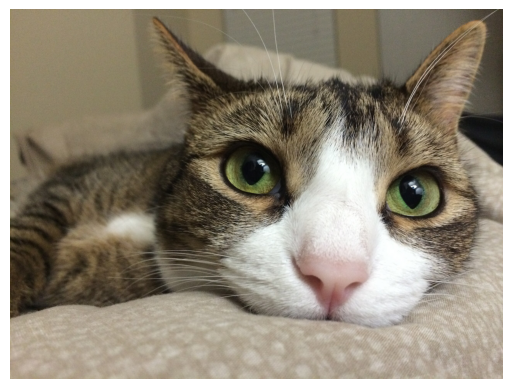

In [32]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='cat.jpeg'
img=image.load_img(img_path,target_size=(64,64))
pic=img
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
result=cnn.predict(img)
if result[0][0]==1:
    print('Doggy')
else:
    print('Kitty')
plt.imshow(image.load_img(img_path))
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Doggy


(-0.5, 5256.5, 3504.5, -0.5)

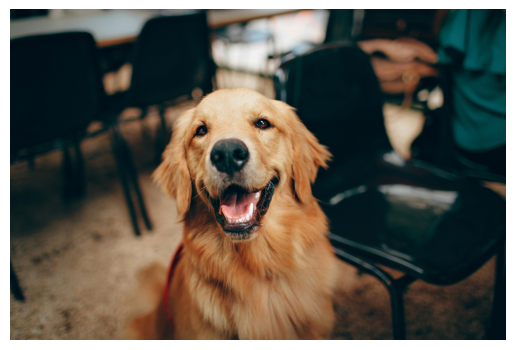

In [33]:
img_path='dog.jpeg'
img=image.load_img(img_path,target_size=(64,64))
pic=img
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
result=cnn.predict(img)
if result[0][0]==1:
    print('Doggy')
else:
    print('Kitty')
plt.imshow(image.load_img(img_path))
plt.axis('off')